In [90]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import pylab as plt
%matplotlib inline

In [91]:
filename = "water_potability.csv"

In [92]:
data = pd.read_csv(filename)

In [93]:
profile = ProfileReport(data, title="Water Potability data Profiling Report")

In [94]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Feature selection

In [95]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [96]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [97]:
listconverttolabel = ["Chloramines","Trihalomethanes",'Turbidity','ph' ] #dsini ak pke smua parameter yg ngaruh 

for i in range(len(listconverttolabel)):
    data[listconverttolabel[i]] = data[listconverttolabel[i]].astype('category')
    data[listconverttolabel[i]+"_cat"] = data[listconverttolabel[i]].cat.codes

In [98]:
data = data.drop(columns=listconverttolabel) #membuang alert, net dkk

In [99]:
data.dtypes

Hardness               float64
Solids                 float64
Sulfate                float64
Conductivity           float64
Organic_carbon         float64
Potability               int64
Chloramines_cat          int16
Trihalomethanes_cat      int16
Turbidity_cat            int16
ph_cat                   int16
dtype: object

In [100]:
y = data["Potability"]
X = data.drop(columns=["Potability", "Hardness", "Solids", "Conductivity","Sulfate", "Organic_carbon", ]) #dibuang smua wkkw gtw bnr g

In [101]:
data = data.dropna() #bs di skip krn di atas udh di drop

In [102]:
data.describe()

,Hardness,Solids,Sulfate,Conductivity,Organic_carbon,Potability,Chloramines_cat,Trihalomethanes_cat,Turbidity_cat,ph_cat
count,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000
mean,196.213489,22065.860761,333.775777,425.529584,14.328318,0.394790,1636.663727,1474.083367,1638.410822,1180.297796
std,32.689075,8763.541797,41.416840,80.774995,3.308675,0.488903,948.327011,935.682511,946.966156,893.000158
min,47.432000,320.942611,129.000000,201.619737,2.200000,0.000000,0.000000,-1.000000,0.000000,-1.000000
25%,176.855409,15623.966291,307.699498,365.210558,12.084461,0.000000,811.500000,648.500000,809.500000,324.500000
50%,197.142637,21043.626929,333.073546,421.625238,14.254641,0.000000,1643.000000,1469.000000,1656.000000,1143.000000
75%,216.421982,27372.857057,359.950170,481.037109,16.620006,1.000000,2448.500000,2276.500000,2463.000000,1958.500000
max,317.338124,61227.196008,481.030642,753.342620,27.006707,1.000000,3275.000000,3113.000000,3275.000000,2784.000000


In [103]:
X.dtypes

Chloramines_cat        int16
Trihalomethanes_cat    int16
Turbidity_cat          int16
ph_cat                 int16
dtype: object

In [104]:
data['Chloramines_cat'] = data['Chloramines_cat'].replace(-1, 0)
data['Trihalomethanes_cat'] = data['Trihalomethanes_cat'].replace(-1, 0)
data['ph_cat'] = data['ph_cat'].replace(-1, 0)

In [107]:
data.describe()

,Hardness,Solids,Sulfate,Conductivity,Organic_carbon,Potability,Chloramines_cat,Trihalomethanes_cat,Turbidity_cat,ph_cat
count,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000
mean,196.213489,22065.860761,333.775777,425.529584,14.328318,0.394790,1636.663727,1474.132265,1638.410822,1180.449699
std,32.689075,8763.541797,41.416840,80.774995,3.308675,0.488903,948.327011,935.605415,946.966156,892.799182
min,47.432000,320.942611,129.000000,201.619737,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,176.855409,15623.966291,307.699498,365.210558,12.084461,0.000000,811.500000,648.500000,809.500000,324.500000
50%,197.142637,21043.626929,333.073546,421.625238,14.254641,0.000000,1643.000000,1469.000000,1656.000000,1143.000000
75%,216.421982,27372.857057,359.950170,481.037109,16.620006,1.000000,2448.500000,2276.500000,2463.000000,1958.500000
max,317.338124,61227.196008,481.030642,753.342620,27.006707,1.000000,3275.000000,3113.000000,3275.000000,2784.000000


In [123]:
nbest = 4

bestfeatures = SelectKBest(score_func=chi2, k=nbest)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ["Features", "Score"]
print(featureScores.nlargest(nbest,"Score"))

ValueError: Input X must be non-negative.

In [106]:
data.describe()

,Hardness,Solids,Sulfate,Conductivity,Organic_carbon,Potability,Chloramines_cat,Trihalomethanes_cat,Turbidity_cat,ph_cat
count,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000
mean,196.213489,22065.860761,333.775777,425.529584,14.328318,0.394790,1636.663727,1474.132265,1638.410822,1180.449699
std,32.689075,8763.541797,41.416840,80.774995,3.308675,0.488903,948.327011,935.605415,946.966156,892.799182
min,47.432000,320.942611,129.000000,201.619737,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,176.855409,15623.966291,307.699498,365.210558,12.084461,0.000000,811.500000,648.500000,809.500000,324.500000
50%,197.142637,21043.626929,333.073546,421.625238,14.254641,0.000000,1643.000000,1469.000000,1656.000000,1143.000000
75%,216.421982,27372.857057,359.950170,481.037109,16.620006,1.000000,2448.500000,2276.500000,2463.000000,1958.500000
max,317.338124,61227.196008,481.030642,753.342620,27.006707,1.000000,3275.000000,3113.000000,3275.000000,2784.000000


In [82]:
from sklearn.feature_selection import f_classif

In [109]:
nbest = 4

bestfeatures = SelectKBest(score_func=f_classif, k=nbest)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ["Features", "Score"]
print(featureScores.nlargest(nbest,"Score"))

              Features     Score
0      Chloramines_cat  2.043780
1  Trihalomethanes_cat  0.582468
3               ph_cat  0.514516
2        Turbidity_cat  0.003433


## Feature importance

In [85]:
from sklearn.ensemble import ExtraTreesClassifier
import pylab as plt

In [110]:
model = ExtraTreesClassifier()
model.fit(X,y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(axis=0,ascending=False)

Chloramines_cat        0.268198
Turbidity_cat          0.249567
Trihalomethanes_cat    0.245371
ph_cat                 0.236863
dtype: float64

In [87]:
type(feature_importances)

pandas.core.series.Series

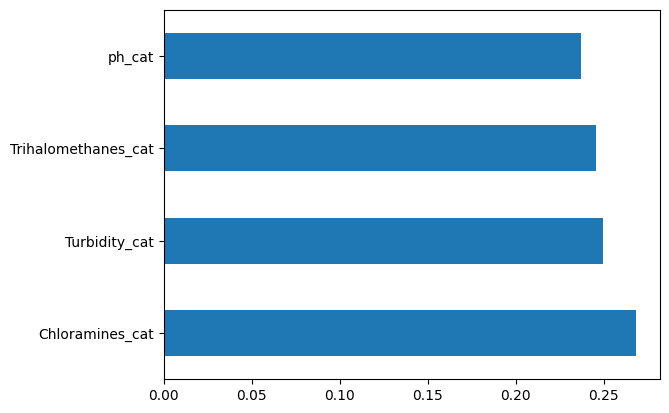

In [116]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(nbest).plot(kind='barh')
plt.show()

## Ekstraksi Fitur

## Principal Component Analysis

In [88]:
from sklearn.decomposition import PCA

In [89]:
pca_transformer = PCA(n_components=0.99)
# flattenX = X.to_numpy().reshape((n, -1))
pca_result = pca_transformer.fit_transform(X.to_numpy())

print(pca_transformer.explained_variance_ratio_)
print(pca_transformer.explained_variance_ratio_[:2].sum())

[0.26416831 0.26237316 0.24739644 0.22606208]
0.5265414763281053


In [120]:
from sklearn import datasets
from sklearn.decomposition import PCA
# Load the data
digits_data = datasets.load_digits()
n = len(digits_data.images)
# Each image is represented as an 8-by-8 array.
# Flatten this array as input to PCA.
image_data = digits_data.images.reshape((n, -1))
print(image_data.shape)
# Groundtruth label of the number appearing in each image
labels = digits_data.target
print(labels)
# Fit a PCA transformer to the dataset.
# The number of components is automatically chosen to account for
# at least 80% of the total variance.
pca_transformer = PCA(n_components=0.8)
pca_images = pca_transformer.fit_transform(image_data)
print(pca_transformer.explained_variance_ratio_)
print(pca_transformer.explained_variance_ratio_[:3].sum())

(1797, 64)
[0 1 2 ... 8 9 8]
[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863]
0.4030395858767508


Text(0.5, 0, 'Principal component 3')

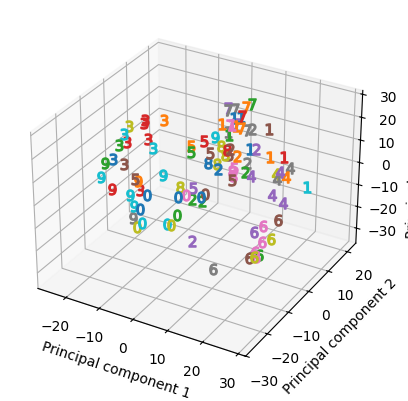

In [121]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(100):
    ax.scatter(pca_images[i,0], pca_images[i,1], pca_images[i,2], marker=r'${}$'.format(labels[i]), s=64)
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3')